In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import nltk  # importing natural language toolkit
import re  # re stands for regular expresssion which helps us to find particular string.
from nltk.corpus import stopwords  # Stopword removes all the unneccessary text values from the test dataset
nltk.download('stopwords')  # downloading the stopword 
nltk.download('vader_lexicon') # downloading the vader_lexicon 
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer   # Porter stemmer is used to get the stem word
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
import lightgbm 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
!pip install lightgbm
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 31.7 MB/s 
     |████████████████████████████████| 9.8 MB 45.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import files  
uploaded = files.upload()

Saving Hascol_Final_data_with_infScoreV1.csv to Hascol_Final_data_with_infScoreV1.csv


In [ ]:
df = pd.read_csv("Hascol_Final_data_with_infScoreV1.csv",parse_dates=True,index_col="Date")
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,Sen_score,Sen_label,Infleunce,T_id,TWITTER HANDLE,s_score_mean,s_sentiment_label,Infs_add,Infs_mean,next_day_close_price,next_day_open_price
Date,,,,,,,,,,,,,,,,,
2016-12-31,365,338.25,349.195,336.88,345.955,1359150,[],[],[],[],[],0.0,NaN,16929.945538,0.0,345.955,338.25
2017-01-01,366,338.25,349.195,336.88,345.955,1359150,[],[],[],[],[],0.0,NaN,16929.945538,0.0,354.390,339.50
2017-02-01,367,339.50,354.390,337.25,354.390,1694400,[],[],[],[],[],0.0,NaN,16929.945538,0.0,354.790,358.99
2017-03-01,368,358.99,364.000,352.00,354.790,1710500,[],[],[],[],[],0.0,NaN,16929.945538,0.0,353.970,353.32
2017-04-01,369,353.32,359.890,353.00,353.970,580300,[],[],[],[],[],0.0,NaN,16929.945538,0.0,351.040,350.98


In [ ]:
df = df[["Close", "s_score_mean", "Open", "High", "Low" , "next_day_open_price", "Infs_add"]]
df = df.dropna()
df.shape

(1095, 7)

In [ ]:
X = df[['Close' , 's_score_mean', 'Infs_add', 'Open']]
Y = df['next_day_open_price']
yy = np.array(Y).reshape(-1, 1)

In [ ]:
X_split = int(0.7 * len(X))
y_split = int(0.7 * len(yy))

X_train = X[: X_split]
X_test = X[X_split:]
y_train = yy[: y_split]
y_test = yy[y_split:]
X_train

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [ ]:
X_train

array([[8.23633264e-01, 4.78752333e-01, 1.11274809e-02],
       [8.23633264e-01, 4.78752333e-01, 1.11274809e-02],
       [8.57867608e-01, 4.78752333e-01, 1.11274809e-02],
       ...,
       [1.06091968e-01, 4.78752333e-01, 7.34132949e-04],
       [1.06091968e-01, 4.78752333e-01, 7.34132949e-04],
       [1.05807866e-01, 4.78752333e-01, 7.34132949e-04]])

In [ ]:
model = XGBRegressor()
model.fit(X_train, y_train.ravel())
# Make some predictions
predicted = model.predict(X_test)

[05:42:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))
print('Mean Squared Error:', mean_squared_error(y_test, predicted))

Root Mean Squared Error: 0.02017624177119061
R-squared : 0.9949273314050203
Mean Squared Error: 0.00040708073200953674


In [ ]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 
stocks.head(10)

,Real,Predicted
Date,,
2019-05-02,169.99,167.094727
2019-06-02,163.50,167.755920
2019-07-02,165.99,166.053558
2019-08-02,164.47,166.075562
2019-09-02,164.47,163.601852
2019-10-02,162.95,162.910706
2019-11-02,158.84,163.653564
2019-12-02,158.78,163.653564
2019-02-13,158.89,163.653564


Text(0.5, 1.0, 'HASCOL Stock Predciiton with xgboost')

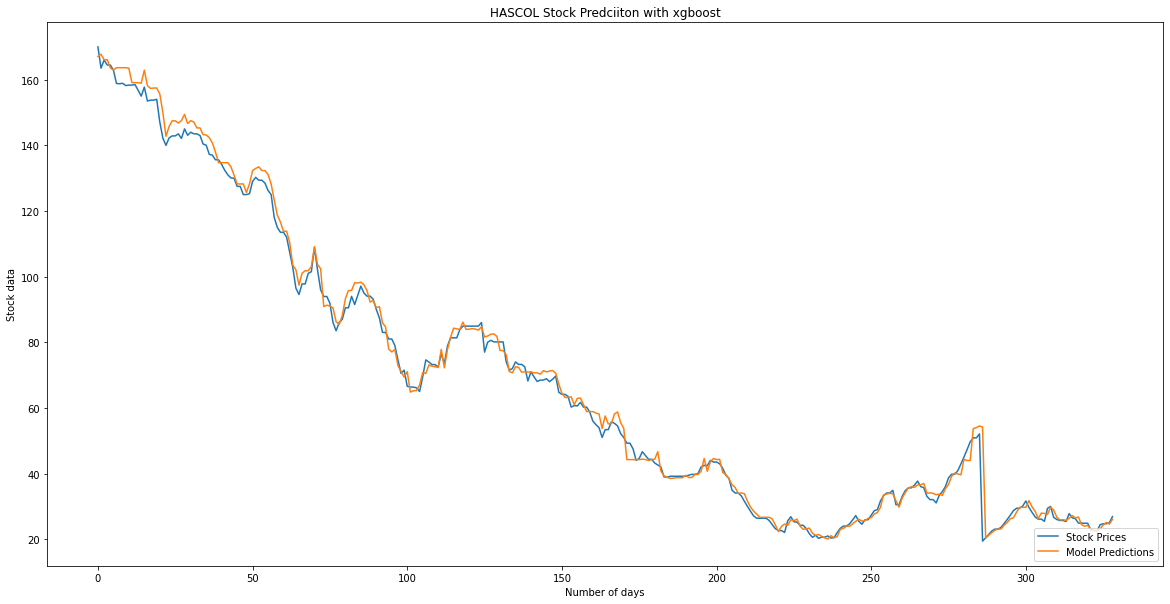

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
#range_future = len(predicted)
plt.plot( np.array(stocks['Real']),label='Test data')
plt.plot( np.array(stocks['Predicted']),label='Prediction')
plt.legend(['Stock Prices', 'Model Predictions'], loc='lower right')
plt.ylabel('Stock data')
plt.xlabel('Number of days')
plt.title('HASCOL Stock Predciiton with xgboost')

LGB-Regressor


In [ ]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(X_train, y_train.ravel())
predicted2 = lgb.predict(X_test)

In [ ]:
predicted2 = lgb.predict(X_test)

In [ ]:
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted2)))
  print('R-squared :', metrics.r2_score(y_test, predicted2))
  print('Mean Squared Error:', mean_squared_error(y_test, predicted2))

Root Mean Squared Error: 0.020482111399812885
R-squared : 0.9947723633854056
Mean Squared Error: 0.0004195168873943449


In [ ]:
# Recover the original prices instead of the scaled version
predicted_prices2 = y_test_scaler.inverse_transform(predicted2.reshape(-1, 1))
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))
stocks = pd.DataFrame({
    "Real2": real_prices.ravel(),
    "Predicted2": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 
stocks.head(10)